In [11]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
from pprint import pprint
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
annFile = "../Datasets/COCO/annotations_trainval2017/annotations/instances_val2017.json"

In [3]:
x

loading annotations into memory...
Done (t=0.95s)
creating index...
index created!


In [6]:
[print(a) for a in dir(coco) if not a.startswith("_")]

annToMask
annToRLE
anns
catToImgs
cats
createIndex
dataset
download
getAnnIds
getCatIds
getImgIds
imgToAnns
imgs
info
loadAnns
loadCats
loadImgs
loadNumpyAnnotations
loadRes
showAnns


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [14]:
for img_id, img_info in coco.imgs.items():
    pprint(f"img_id: {img_id}")
    pprint(img_info)
    break

'img_id: 397133'
{'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'date_captured': '2013-11-14 17:02:52',
 'file_name': '000000397133.jpg',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'height': 427,
 'id': 397133,
 'license': 4,
 'width': 640}


In [15]:
for key in coco.anns.keys():
    pprint(coco.anns[key])
    break

{'area': 702.1057499999998,
 'bbox': [473.07, 395.93, 38.65, 28.67],
 'category_id': 18,
 'id': 1768,
 'image_id': 289343,
 'iscrowd': 0,
 'segmentation': [[510.66,
                   423.01,
                   511.72,
                   420.03,
                   510.45,
                   416.0,
                   510.34,
                   413.02,
                   510.77,
                   410.26,
                   510.77,
                   407.5,
                   510.34,
                   405.16,
                   511.51,
                   402.83,
                   511.41,
                   400.49,
                   510.24,
                   398.16,
                   509.39,
                   397.31,
                   504.61,
                   399.22,
                   502.17,
                   399.64,
                   500.89,
                   401.66,
                   500.47,
                   402.08,
                   499.09,
                   401.87,


In [16]:
pprint(coco.cats)

{1: {'id': 1, 'name': 'person', 'supercategory': 'person'},
 2: {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 3: {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 4: {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 5: {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 6: {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 7: {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 8: {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 9: {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 10: {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 11: {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 13: {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 14: {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 15: {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 16: {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 17: {'id': 17, 'name': 'cat', 'supercategory': 'animal'},

In [18]:
pprint(coco.getCatIds()[:10])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [19]:
pprint(coco.getImgIds()[:10])


[397133, 37777, 252219, 87038, 174482, 403385, 6818, 480985, 458054, 331352]


In [20]:
pprint(coco.getAnnIds()[:10])


[1768, 1773, 2551, 3186, 3419, 3658, 4594, 7544, 7915, 7981]


In [21]:
print(len(coco.getImgIds()))
print(len(coco.getAnnIds()))

5000
36781


In [23]:
im = coco.loadImgs(397133)[0]

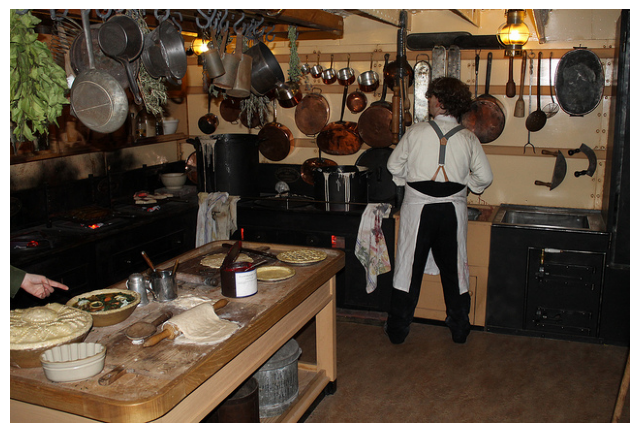

In [24]:
I = io.imread(im['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

[82445, 119568, 200887, 693231, 713388, 716434, 1125079, 1218137, 1878837, 1883614, 1902250, 1902971, 1914453, 2105658, 2114911, 2114949, 2139366, 2188144, 2196309]


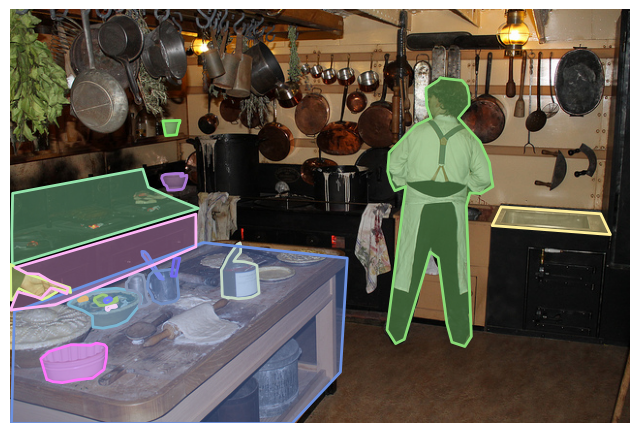

In [30]:
# load and display instance annotations
imgs = coco.loadImgs([397133])
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=imgs[0]['id'],iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns,draw_bbox=False)

In [32]:
annFile = "../Datasets/COCO/annotations_trainval2017/annotations/person_keypoints_val2017.json"
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.19s)
creating index...
index created!


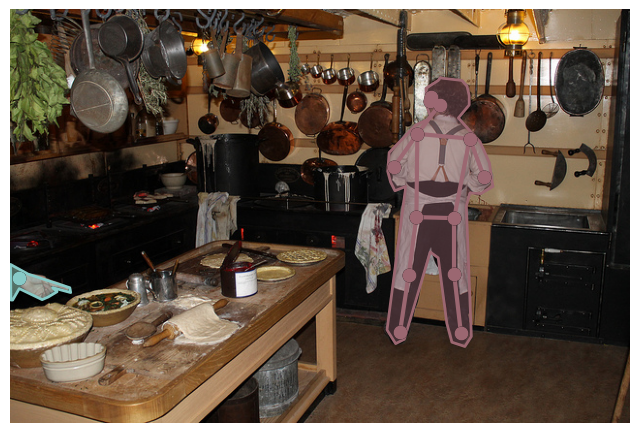

In [34]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=imgs[0]['id'], iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)